In [14]:
import sys
sys.path.append('../libs')

from esnlib import *
from helpers import *
import pandas as pd

from sklearn import preprocessing
import sklearn.metrics as metrics

import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import sklearn.metrics as sm

%matplotlib inline

In [15]:
data = pd.read_csv('../../data/canela1_merged.csv',index_col=0).values


input_steps = 12
prediction_steps = 12
train_perc = 0.8

X,y = getDataWindowed(data,input_steps,prediction_steps)

trainlen = int(train_perc*len(X))
X_train,X_test = X[:trainlen], X[trainlen:]
y_train,y_test = y[:trainlen], y[trainlen:]

In [16]:
minmax_in = preprocessing.MinMaxScaler(feature_range=(-1,1)) 
standarization_in = preprocessing.StandardScaler()
minmax_out = preprocessing.MinMaxScaler(feature_range=(-1,1)) 
standarization_out = preprocessing.StandardScaler()

minmax_in.fit(X_train)
minmax_out.fit(y_train)
standarization_in.fit(X_train)
standarization_out.fit(X_train)
preproc_in = minmax_in
preproc_out = minmax_out

In [17]:
X_train = preproc_in.transform(X_train) if preproc_in else X_train
X_test = preproc_in.transform(X_test) if preproc_in else X_test

y_train = preproc_out.transform(y_train) if preproc_out else y_train
y_test = preproc_out.transform(y_test) if preproc_out else y_test

In [27]:
def scorer(estimator, X,y):
    y_pred = estimator.predict(X,cont=True)
    return -metrics.mean_squared_error(y,y_pred)

n_splits = 5
tscv = ms.TimeSeriesSplit(n_splits=5)


#PARAMS
n_reservoir = 1000
sparsity = 0.9
leaking_rate = 0.3
regularization=1e-8
clf = ESN(random_state=42,n_reservoir=n_reservoir,sparsity=sparsity, 
          leaking_rate=leaking_rate,regularization=regularization)

In [28]:
score = ms.cross_val_score(clf,X_train,y_train, cv = tscv, n_jobs=-1,scoring=scorer)

In [29]:
clf.fit(X_train,y_train)

ESN(activation=<ufunc 'tanh'>, leaking_rate=0.3, n_inputs=24, n_outputs=12,
  n_reservoir=1000,
  random_state=<mtrand.RandomState object at 0x7fd00b4cbaf8>,
  regularization=1e-08, sparsity=0.9, spectral_radius=0.135)

In [30]:
y_train_approx = clf.predict(X_train, cont=False)

In [31]:
y_test_approx = clf.predict(X_test,cont=True)

In [33]:
show_errors(y_train,y_train_approx)

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,0.120902,0.147499,0.168916,0.186018,0.199303,0.209319,0.217409,0.223745,0.229176,0.233148,0.236005,0.237974,0.200784
MSE,0.033677,0.047371,0.059674,0.070583,0.079341,0.086024,0.091255,0.095406,0.099103,0.101719,0.103479,0.104925,0.081046
MeAE,0.070746,0.091768,0.108789,0.123674,0.135794,0.145852,0.154943,0.162098,0.167601,0.170925,0.172947,0.174444,0.139965
MAPE,0.181372,0.221260,0.253373,0.279009,0.298912,0.313906,0.326009,0.335481,0.343596,0.349522,0.353785,0.356720,0.301079
$r^2$,0.811276,0.734465,0.665406,0.604120,0.554868,0.517162,0.487599,0.464061,0.443116,0.428225,0.418230,0.410039,0.544881


In [34]:
show_errors(y_test_approx , y_test)

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,0.141676,0.172388,0.197288,0.216115,0.232339,0.245163,0.255375,0.264395,0.269600,0.274513,0.275167,0.275303,0.234943
MSE,0.048313,0.066241,0.082209,0.095085,0.107038,0.118296,0.126571,0.134929,0.138691,0.142665,0.142320,0.142175,0.112044
MeAE,0.082685,0.106366,0.127411,0.141769,0.159112,0.168330,0.177799,0.186092,0.190582,0.193120,0.196174,0.196944,0.160532
MAPE,0.211257,0.257984,0.296113,0.325441,0.352095,0.373027,0.389269,0.404158,0.411679,0.418690,0.418760,0.417604,0.356340
$r^2$,0.622323,0.426316,0.225252,0.036894,-0.135887,-0.304546,-0.462686,-0.611683,-0.740232,-0.885267,-0.990201,-1.050083,-0.322483


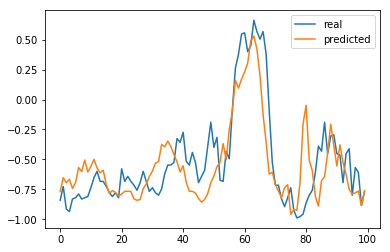

In [37]:
plt.plot(y_test[:100,11],label="real")
plt.plot(y_test_approx[:100,11],label="predicted")
plt.legend()

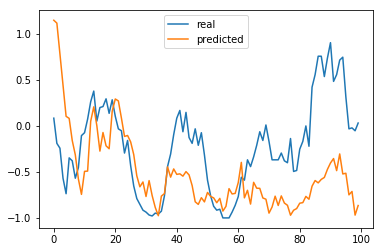

In [35]:
plt.plot(y_train[:100,11],label="real")
plt.plot(y_train_approx[:100,11],label="predicted")
plt.legend()

In [14]:
show_errors(y_train,y_train_approx)

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,0.125581,0.154745,0.177976,0.196401,0.210884,0.222410,0.232387,0.240493,0.246924,0.252156,0.256376,0.259556,0.214658
MSE,0.037381,0.053193,0.067235,0.079098,0.089025,0.097184,0.103956,0.109483,0.113957,0.117614,0.120473,0.122690,0.092607
MeAE,0.070286,0.091421,0.109724,0.126503,0.137753,0.147311,0.155646,0.163836,0.169412,0.174446,0.177836,0.180622,0.142066
MAPE,0.184180,0.226949,0.261014,0.288032,0.309269,0.326167,0.340793,0.352678,0.362107,0.369772,0.375954,0.380606,0.314794
$r^2$,0.771711,0.675134,0.589373,0.516923,0.456306,0.406473,0.365114,0.331361,0.304033,0.281668,0.264175,0.250583,0.434405


In [15]:
show_errors(y_test_approx , y_test)

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,0.122979,0.152586,0.173727,0.191772,0.206370,0.218404,0.227777,0.235411,0.241406,0.246193,0.249735,0.252700,0.209922
MSE,0.037659,0.053567,0.066225,0.077203,0.086059,0.093457,0.099301,0.104150,0.107780,0.110650,0.112628,0.114405,0.088590
MeAE,0.066551,0.089757,0.107677,0.123532,0.137028,0.147114,0.157542,0.164248,0.171180,0.176488,0.181269,0.183822,0.142184
MAPE,0.170973,0.212962,0.243323,0.269445,0.290827,0.308563,0.322500,0.333907,0.342936,0.350099,0.355422,0.359871,0.296736
$r^2$,0.644739,0.421093,0.178345,-0.091982,-0.376264,-0.674565,-0.980967,-1.289731,-1.577434,-1.849784,-2.077941,-2.286026,-0.830043
